<a href="https://colab.research.google.com/github/nessydsouza765/abc/blob/main/knn%2Csvc%2Cbayes%2Cimbalance_framingham_Nessy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
df["education"]=df["education"].fillna(df["education"].mode()[0])
df["cigsPerDay"]=df["cigsPerDay"].fillna(df["cigsPerDay"].mode()[0])
df["BPMeds"]=df["BPMeds"].fillna(df["BPMeds"].mode()[0])
df["totChol"]=df["totChol"].fillna(df["totChol"].mode()[0])
df["sysBP"]=df["sysBP"].fillna(df["sysBP"].mean())
df["BMI"]=df["BMI"].fillna(df["BMI"].mean())
df["heartRate"]=df["heartRate"].fillna(df["heartRate"].mode()[0])
df["glucose"]=df["glucose"].fillna(df["glucose"].mode()[0])

In [ ]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,75.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
X=df.iloc[:,:-1]
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,75.0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [ ]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=1,test_size=0.3)


In [ ]:
X_train.shape,y_train.shape

((2968, 15), (2968,))

In [ ]:
X_test.shape,y_test.shape

((1272, 15), (1272,))

**knn**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

0.8309748427672956
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1085
           1       0.27      0.09      0.14       187

    accuracy                           0.83      1272
   macro avg       0.57      0.52      0.52      1272
weighted avg       0.77      0.83      0.79      1272



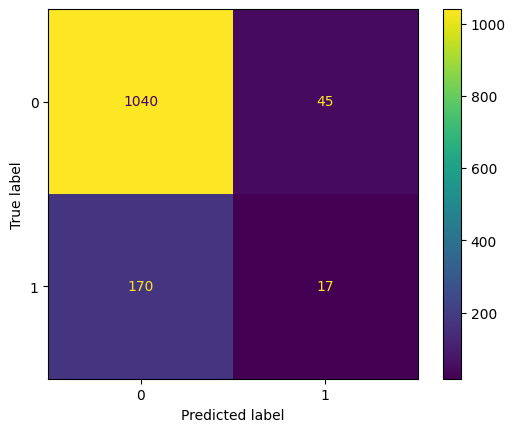

In [ ]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
print(accuracy_score(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))


**svc**

In [ ]:
from sklearn.svm import SVC
sv=SVC(kernel="rbf")
sv.fit(X_train,y_train)

SVC()

In [ ]:
y_pred1=sv.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

0.8522012578616353
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1085
           1       0.33      0.01      0.01       187

    accuracy                           0.85      1272
   macro avg       0.59      0.50      0.47      1272
weighted avg       0.78      0.85      0.79      1272



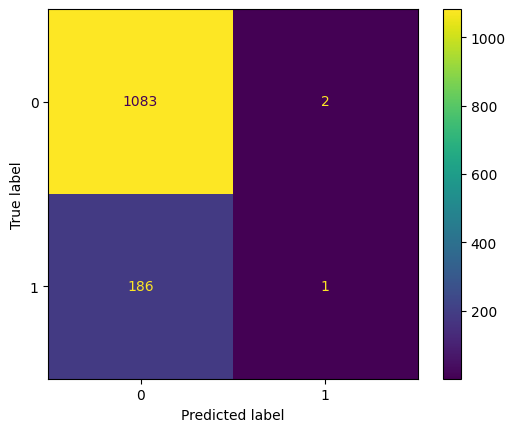

In [ ]:
print(accuracy_score(y_test,y_pred1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

Naive **Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
y_pred_nb

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1085
           1       0.36      0.22      0.28       187

    accuracy                           0.83      1272
   macro avg       0.62      0.58      0.59      1272
weighted avg       0.80      0.83      0.81      1272



In [ ]:
df["TenYearCHD"].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [ ]:
#oversampling
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [ ]:
X_os

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.000000,0,0.0,0.0,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000
1,0,46,2.000000,0,0.0,0.0,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000
2,1,48,1.000000,1,20.0,0.0,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000
3,0,61,3.000000,1,30.0,0.0,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000
4,0,46,3.000000,1,23.0,0.0,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7187,1,51,1.910991,0,0.0,0.0,0,0,0,311.513146,134.910991,89.356034,29.121032,64.534052,73.821983
7188,0,63,2.900901,0,0.0,0.0,0,1,0,379.058560,174.603604,79.090089,20.504774,68.842341,95.396396
7189,0,54,1.000000,0,0.0,0.0,0,1,0,233.558101,170.876432,94.142389,26.816465,93.078561,74.000000
7190,0,60,1.000000,0,0.0,0.0,0,1,0,258.656134,144.077136,89.264869,33.083541,65.656134,104.968401


In [ ]:
y_os

0       0
1       0
2       0
3       1
4       0
       ..
7187    1
7188    1
7189    1
7190    1
7191    1
Name: TenYearCHD, Length: 7192, dtype: int64

In [ ]:
y_os.value_counts()

0    3596
1    3596
Name: TenYearCHD, dtype: int64

In [ ]:
mms=MinMaxScaler()
X_os_Scaled=mms.fit_transform(X_os)
X_os_Scaled

array([[1.        , 0.18421053, 1.        , ..., 0.27702375, 0.36363636,
        0.10451977],
       [0.        , 0.36842105, 0.33333333, ..., 0.31968008, 0.51515152,
        0.10169492],
       [1.        , 0.42105263, 0.        , ..., 0.23751818, 0.31313131,
        0.08474576],
       ...,
       [0.        , 0.57894737, 0.        , ..., 0.27330258, 0.49574304,
        0.0960452 ],
       [0.        , 0.73684211, 0.        , ..., 0.42519489, 0.21874882,
        0.18352656],
       [1.        , 0.44736842, 0.24174945, ..., 0.30948462, 0.21867182,
        0.09449293]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_os_Scaled,y_os,test_size=0.3,random_state=1)

In [ ]:
from sklearn.svm import SVC
kn=KNeighborsClassifier()
sv=SVC()
nbs=GaussianNB()
models=[kn,sv,nbs]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1074
           1       0.75      0.82      0.78      1084

    accuracy                           0.77      2158
   macro avg       0.77      0.77      0.77      2158
weighted avg       0.77      0.77      0.77      2158

SVC()
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1074
           1       0.70      0.75      0.73      1084

    accuracy                           0.71      2158
   macro avg       0.72      0.71      0.71      2158
weighted avg       0.72      0.71      0.71      2158

GaussianNB()
              precision    recall  f1-score   support

           0       0.58      0.85      0.69      1074
           1       0.72      0.38      0.50      1084

    accuracy                           0.61      2158
   macro avg       0.65      0.62      0.59      2158
weighted avg       0.65      0.6

In [ ]:
#undersampling
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X,y)

In [ ]:
y_us.value_counts()

0    644
1    644
Name: TenYearCHD, dtype: int64

In [ ]:
X_us

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,64,1.0,1,20.0,0.0,0,0,0,214.0,116.0,77.0,22.48,72.0,71.0
1,0,50,1.0,1,20.0,0.0,0,1,0,248.0,154.5,104.0,19.88,75.0,87.0
2,0,41,1.0,0,0.0,0.0,0,1,0,265.0,136.0,98.0,42.15,90.0,75.0
3,0,51,3.0,1,15.0,0.0,0,1,0,275.0,150.0,99.0,23.17,75.0,65.0
4,0,40,2.0,0,0.0,0.0,0,0,0,195.0,109.5,72.0,22.36,70.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,1,50,1.0,0,0.0,0.0,0,0,0,260.0,119.0,74.0,21.85,80.0,72.0
1284,1,56,4.0,0,0.0,1.0,0,1,0,287.0,149.0,98.0,21.68,90.0,75.0
1285,1,58,1.0,0,0.0,0.0,0,0,0,233.0,125.5,84.0,26.05,67.0,76.0
1286,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0


In [ ]:
scaler=MinMaxScaler()
X_us_scaled=scaler.fit_transform(X_us)
X_us_scaled

array([[1.        , 0.84210526, 0.        , ..., 0.1596474 , 0.3375    ,
        0.08757062],
       [0.        , 0.47368421, 0.        , ..., 0.09598433, 0.375     ,
        0.13276836],
       [0.        , 0.23684211, 0.        , ..., 0.64128306, 0.5625    ,
        0.09887006],
       ...,
       [1.        , 0.68421053, 0.        , ..., 0.2470617 , 0.275     ,
        0.10169492],
       [1.        , 0.94736842, 0.        , ..., 0.17580803, 0.1875    ,
        0.11016949],
       [1.        , 0.47368421, 0.        , ..., 0.24510284, 0.2625    ,
        0.1299435 ]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_us_scaled,y_us,random_state=1,test_size=0.3)

In [ ]:
kn=KNeighborsClassifier()
sv=SVC()
nbs=GaussianNB()
models=[kn,sv,nbs]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       196
           1       0.59      0.61      0.60       191

    accuracy                           0.60       387
   macro avg       0.60      0.60      0.60       387
weighted avg       0.60      0.60      0.60       387

SVC()
              precision    recall  f1-score   support

           0       0.68      0.56      0.61       196
           1       0.62      0.73      0.67       191

    accuracy                           0.64       387
   macro avg       0.65      0.64      0.64       387
weighted avg       0.65      0.64      0.64       387

GaussianNB()
              precision    recall  f1-score   support

           0       0.54      0.97      0.70       196
           1       0.85      0.15      0.26       191

    accuracy                           0.57       387
   macro avg       0.70      0.56      0.48       387
weighted avg       0.69      0.5